In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import statsmodels.api as statsmodel
import os

In [ ]:
df=pd.read_csv('/content/dataset.csv')

In [ ]:
df


,Gender,Age,Course,Studying year,Marital status,Any depression,Anxiety,Past Trauma,Stress,Insomnia,Agoraphobia,Abuses/Discriminations,Confident levels
0,Female,18,Degree,year 1,No,Yes,No,Yes,No,Yes,Yes,Yes,Low
1,Male,21,Degree,year 2,No,No,Yes,No,No,Yes,No,No,Low
2,Male,19,Degree,Year 1,No,Yes,Yes,Yes,No,Yes,Yes,No,Low
3,Female,22,Engineering,year 3,Yes,Yes,No,No,No,No,No,Yes,Good
4,Male,23,Degree,year 4,No,No,No,No,No,No,No,Yes,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,Male,24,Degree,year 1,No,Yes,No,No,Yes,No,No,Yes,High
1995,Male,20,Engineering,year 3,No,No,No,No,No,No,No,Yes,Low
1996,Female,23,Degree,Year 2,Yes,Yes,No,Yes,Yes,No,No,No,Good
1997,Male,24,Degree,Year 2,Yes,No,Yes,No,Yes,No,No,No,High


In [ ]:
#exploratory data analysis
df.shape


(1999, 13)

In [ ]:
df.describe()

,Age
count,1999.000000
mean,20.943972
std,2.625787
min,0.000000
25%,19.000000
50%,21.000000
75%,23.000000
max,25.000000


In [ ]:
df.head(2)

,Gender,Age,Course,Studying year,Marital status,Any depression,Anxiety,Past Trauma,Stress,Insomnia,Agoraphobia,Abuses/Discriminations,Confident levels
0,Female,18,Degree,year 1,No,Yes,No,Yes,No,Yes,Yes,Yes,Low
1,Male,21,Degree,year 2,No,No,Yes,No,No,Yes,No,No,Low


In [ ]:
#missing values
df.isnull().sum()

Gender                    0
Age                       0
Course                    0
Studying year             3
Marital status            0
Any depression            0
Anxiety                   1
Past Trauma               0
Stress                    0
Insomnia                  3
Agoraphobia               0
Abuses/Discriminations    1
Confident levels          0
dtype: int64

In [ ]:
#filling vth mean value
df['Studying year']=df['Studying year'].fillna((df['Studying year'].mean()))

TypeError: ignored

In [ ]:
a=df['Age'].unique()
a

array([18, 21, 19, 22, 23, 20, 24,  0, 25, 17])

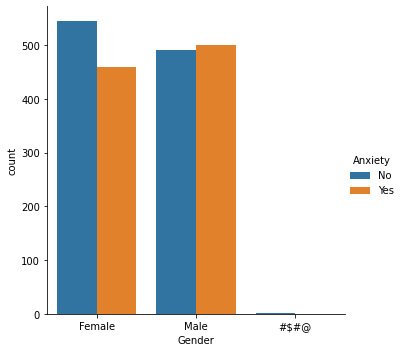

In [ ]:
sns.catplot(x='Gender',hue='Anxiety',kind='count',data=df)

In [ ]:
df[df['Gender'].isin(Gender)]

NameError: ignored